> 구글 드라이브
https://colab.research.google.com/drive/1rSd8zTIwv1koIP1pRUrqHylnNkZ1AAQU 
    
 
4월 인공지능 이산수학 pdf_124p  

####  행렬 곱셈을 이해하는 필살기
- 행렬곱은
1. **뒤에서 곱하는 행렬**의 각 **열**의 요소를 계수로 **앞** 행렬의 **모든 열을 선형결합**
2. **앞에서 곱하는 행렬**의 각 **행**의 요소를 계수로 **뒤** 행렬의 **모든 행을 선형결합**
3. **앞에서 곱하는 행렬**의 각 **열**의 요소를 계수로 **뒤** 행렬의 **모든 행을 외적한 것들의 곱**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

> ### 행렬과 벡터

#### 1. 덧셈
4월 인공지능 이산수학 pdf_129p

In [3]:
# 행렬과 행렬의 덧셈은 요소끼리 덧셈
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

##### 스칼라  곱셈

In [6]:
# 행렬과 스칼라의 곱셈은 전체 요소에 곱셈
3*B

array([[ 30,  60],
       [ 90, 120]])

#### 2. 곱셉

In [7]:
# 행렬과 행렬의 곱셈
A = np.array([[1,2,3], [4,5,6]]) 
B = np.array([[2,1], [1,2], [1,1]])
print(np.dot(A,B))

# 그냥 곱하면 에러가 남 
# A*B

########################################
# 그냥 곱하고 싶으면?
A_ = np.matrix(A)
B_ = np.matrix(B)
A_*B_

[[ 7  8]
 [19 20]]


matrix([[ 7,  8],
        [19, 20]])

#### 3. 행렬의 전치

In [14]:
# 열을 행으로 행을 열로
A = np.matrix([[1,2,3],[4,5,6]])
print(f'A: \n{A}')
print()
print(f'AT:\n{A.T}')

A: 
[[1 2 3]
 [4 5 6]]

AT:
[[1 4]
 [2 5]
 [3 6]]


In [17]:
# 곱의 전치
B = np.matrix([[3,4],[6,5],[1,2]])

print(f'(A*B).T\n{(A*B).T}')
print()
print(f'(A*B).T\n{B.T * A.T}')

(A*B).T
[[18 48]
 [20 53]]

(A*B).T
[[18 48]
 [20 53]]


#### 단위행렬

In [18]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2))

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


### 행렬을 이용한 데이터 표현
#### 테이블형 데이터

In [19]:
from sklearn.datasets import load_iris

In [20]:
data = load_iris()

pd.DataFrame(data.data, columns = data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 이미지

In [21]:
!gdown --id 1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv

zsh:1: command not found: gdown


In [22]:
import matplotlib as mpl

In [25]:
old_python = mpl.image.imread('old_python.png')

In [ ]:
old_python.shape

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=5)

ch = ['Red', 'Green', 'Blue', 'Alpha']
cm = ['Reds', 'Greens', 'Blues', 'binary']

for i, ax_i in enumerate(ax[:-1]):
    ax_i.imshow(old_python[:,:,i], cmap=cm[i])
    ax_i.set_title(ch[i])

ax[-1].imshow(old_python)

plt.show()`

## 행렬곱
### 열결합

In [31]:
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,3)
print(f'A\n{A}')
print(f'B\n{B}')
print()
print(np.dot(A,B))

A
[[2 3 3]
 [8 9 4]
 [4 6 8]
 [7 7 3]]
B
[8 5 7]

[ 52 137 118 112]


In [32]:
print(A.shape) # 4x3행랼
print(A[1,:])

(4, 3)
[8 9 4]


In [34]:
# 행렬*벡터 열 결합 [+]
c = np.zeros(4, dtype=int)
for i in range(A.shape[1]):
    c += A[:,i]*B[i]
    
c

array([ 52, 137, 118, 112])

In [35]:
# 열결합 방법 1
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,6).reshape(3,2)
np.dot(A,B)

array([[ 64,  84],
       [ 97, 141],
       [ 50,  84],
       [120, 141]])

In [36]:
# 열결합 방법 2
C = np.zeros((4,2))

# 행렬*행렬 열결합 [+]
for j in range(B.shape[1]): # b를 중심으로 돈다 
    c = np.zeros(4, dtype=int) # 0으로 채워진 행렬에 곱
    for i in range(A.shape[1]):  # a를 중심으로 돈다(a원소들 곱함) 
        c += A[:,i]*B[i,j]

    C[:,j] = c

print(C)

[[ 64.  84.]
 [ 97. 141.]
 [ 50.  84.]
 [120. 141.]]


### 행 결합

In [37]:
# 방법1
At = A.T
Bt = B.T

np.dot(Bt,At)# dot = 곱해

array([[ 64,  97,  50, 120],
       [ 84, 141,  84, 141]])

In [38]:
#  방법2
C = np.zeros((2,4))

# 행렬*행렬 행결합 [+]
for i in range(Bt.shape[0]):
    c = np.zeros(4, dtype=int)
    for j in range(At.shape[0]):
        c += Bt[i,j] * At[j,:]

    C[i,:] = c

print(C)

[[ 64.  97.  50. 120.]
 [ 84. 141.  84. 141.]]


### 외적합

In [39]:
# 방법1
A = np.random.randint(1,10,12).reshape(4,3) # 1부터 10까지 12개원소, 4행3열로 랜덤 생성
B = np.random.randint(1,10,6).reshape(3,2)
print(A)
print(B)
np.dot(A,B)

[[7 8 1]
 [7 3 7]
 [9 3 8]
 [7 5 4]]
[[1 8]
 [7 4]
 [7 4]]


array([[ 70,  92],
       [ 77,  96],
       [ 86, 116],
       [ 70,  92]])

In [40]:
# 방법2
C = np.zeros((4,2))

# 행렬*행렬 외적합[+]
for j in range(A.shape[1]):
    C += np.dot(A[:,[j]], B[[j],:]) # a의 모든 열, b의 모든 행을 곱하여 c에 더함

print(C)

[[ 70.  92.]
 [ 77.  96.]
 [ 86. 116.]
 [ 70.  92.]]


## 인공신경망의 행렬 표현
### 데이터 로딩

In [43]:
data = pd.read_csv('data.csv', names=['x','y','target'])
data['bias'] = 1
data

,x,y,target,bias
0,2.7540,3.5407,1.0,1
1,1.4545,2.5541,1.0,1
2,4.4647,4.4815,1.0,1
3,0.6279,1.0362,0.0,1
4,0.2573,2.2040,0.0,1
...,...,...,...,...
495,4.5226,3.8735,1.0,1
496,4.8601,1.1903,1.0,1
497,0.6119,1.2026,0.0,1
498,2.9004,1.8535,1.0,1


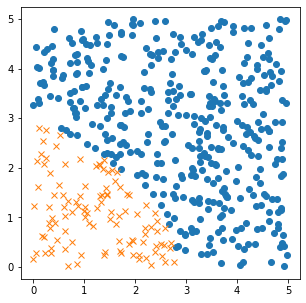

In [44]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(data[data['target']==1]['x'], data[data['target']==1]['y'], 'o')
ax.plot(data[data['target']==0]['x'], data[data['target']==0]['y'], 'x')

plt.show()

In [45]:
X = data[['bias', 'x', 'y']].to_numpy()
y = data['target']

#### 점 하나씩 계산

In [46]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

W1 = np.array([
    [-15, 3, 5],
    [18, -6, -3]              
])

W2 = np.array([
    [4, 10, -9]
])

# 0번 점에 대해서만 계산, 엑셀 시트와 똑같은 상황[+]
a = sigmoid( np.dot(W1, X[0].T) )
print(a)
a = np.concatenate(([1], a))
print(a)
y_hat = sigmoid( np.dot(W2, a) )

y_hat, y[0]

[9.99982712e-01 1.06623499e-04]
[1.00000000e+00 9.99982712e-01 1.06623499e-04]


(array([0.99999917]), 1.0)

#### 모든 점을 한번에 계산

In [47]:
# 행렬곱으로 모든점을 한번에 계산[+]
a = sigmoid( np.dot(W1, X.T) )
print(a.shape)
a = np.concatenate((np.ones(500).reshape(1,-1), a))
print(a.shape)
y_hat = sigmoid( np.dot(W2, a) )

(2, 500)
(3, 500)


In [48]:
pd.DataFrame([y_hat[0],y]).T

,0,1
0,0.999999,1.0
1,0.995680,1.0
2,0.999999,1.0
3,0.006718,0.0
4,0.009845,0.0
...,...,...
495,0.999999,1.0
496,0.999999,1.0
497,0.006746,0.0
498,0.999999,1.0


In [49]:
y_hat = y_hat[0] >= 0.5
y_hat

array([ True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,

In [50]:
(y_hat != y).sum()

2